<a href="https://www.kaggle.com/zeyadalmothafar/disney-movies-and-tv-shows-recons?scriptVersionId=85377090" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans
import networkx as nx
import time
import math as math

import re

In [2]:
#Data: https://www.kaggle.com/shivamb/disney-movies-and-tv-shows
df = pd.read_csv('../input/disney-movies-and-tv-shows/disney_plus_titles.csv')

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [5]:
df['country'].fillna('Unknown', inplace = True)

In [6]:
df['director'].fillna('Unknown', inplace = True)

In [7]:
df['cast'].fillna('Unknown', inplace = True)

In [8]:
df['rating'].mode()

0    TV-G
dtype: object

In [9]:
df['rating'].value_counts()

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: rating, dtype: int64

In [10]:
df['listed_in'].value_counts()

Animation, Comedy, Family                        124
Action-Adventure, Animation, Comedy               77
Action-Adventure, Animation, Kids                 45
Action-Adventure, Animation, Family               40
Animals & Nature, Documentary, Family             40
                                                ... 
Animals & Nature, Family, Reality                  1
Dance, Music, Musical                              1
Comedy, Family, Lifestyle                          1
Buddy, Docuseries                                  1
Action-Adventure, Animals & Nature, Animation      1
Name: listed_in, Length: 329, dtype: int64

In [11]:
df['rating'].fillna(df['rating'].mode(),inplace = True)

In [12]:
df['duration'].value_counts()

1 Season     219
2 Seasons     82
3 Seasons     45
44 min        42
7 min         42
            ... 
120 min        1
56 min         1
19 min         1
30 min         1
68 min         1
Name: duration, Length: 158, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      1450 non-null   object
 4   cast          1450 non-null   object
 5   country       1450 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


<AxesSubplot:xlabel='type', ylabel='count'>

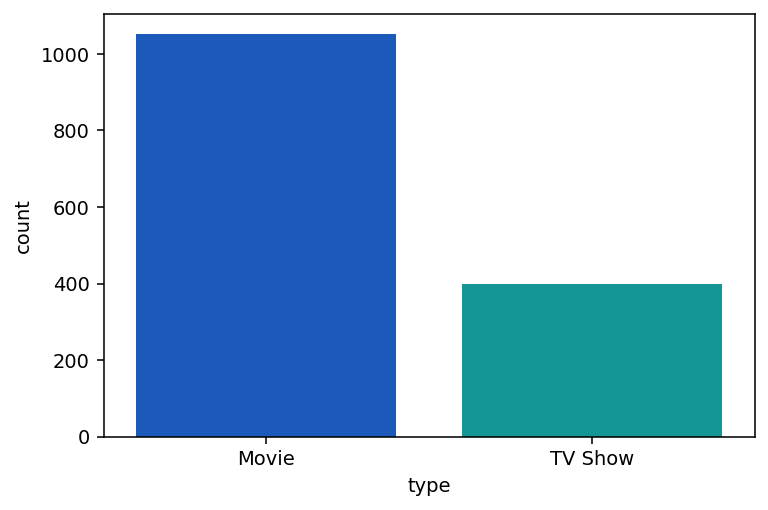

In [14]:
sns.countplot(data = df ,x = df['type'],palette = 'winter')

In [15]:
df['release_year'] = pd.to_numeric(df['release_year'])

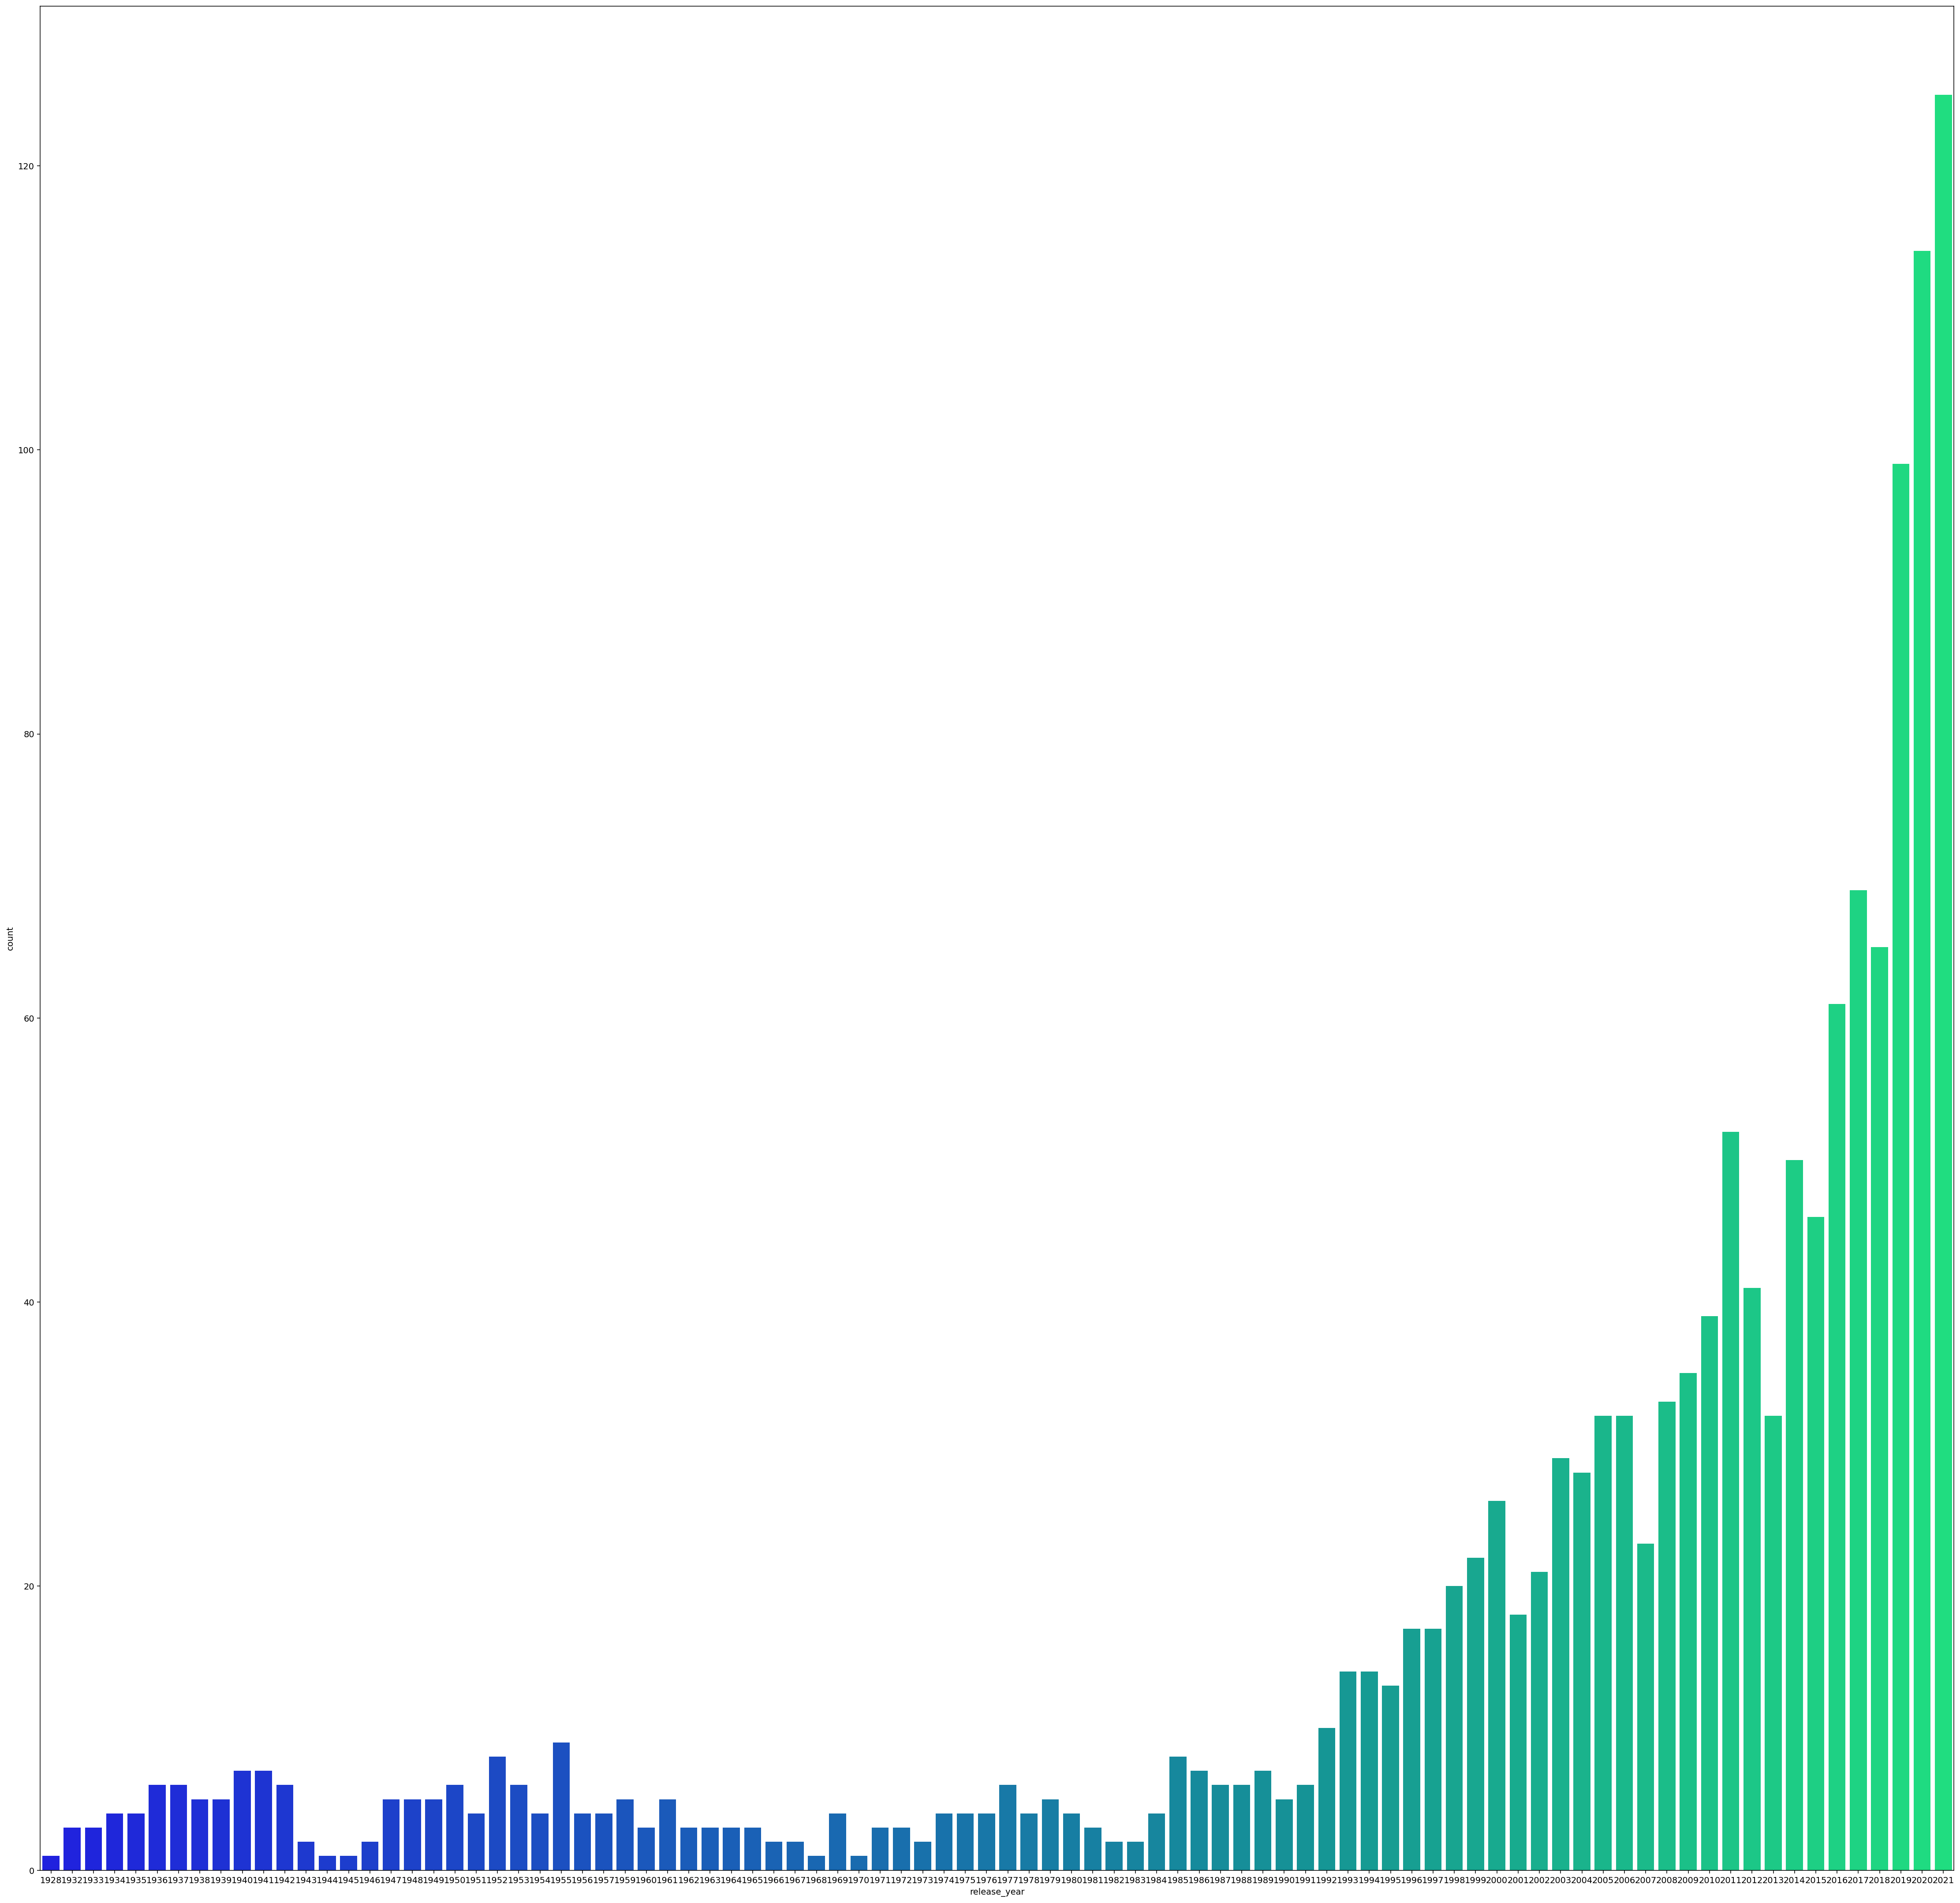

In [16]:
plt.figure(figsize = (40,40))
sns.countplot(data = df ,x = df['release_year'],palette = 'winter')
plt.show()

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Disney Plus {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

There are 36 types in the Disney Plus Movie Dataset


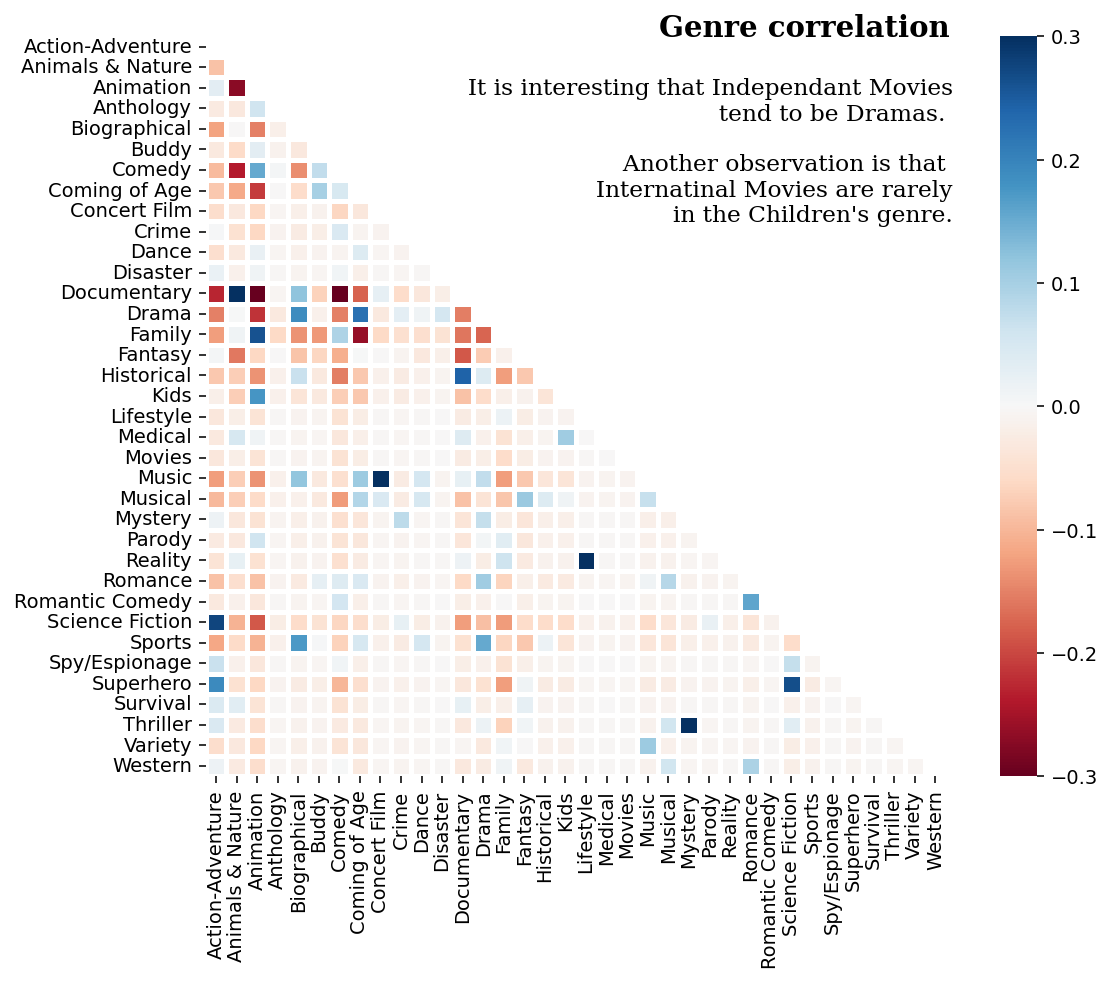

In [19]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df['count'] = 1
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

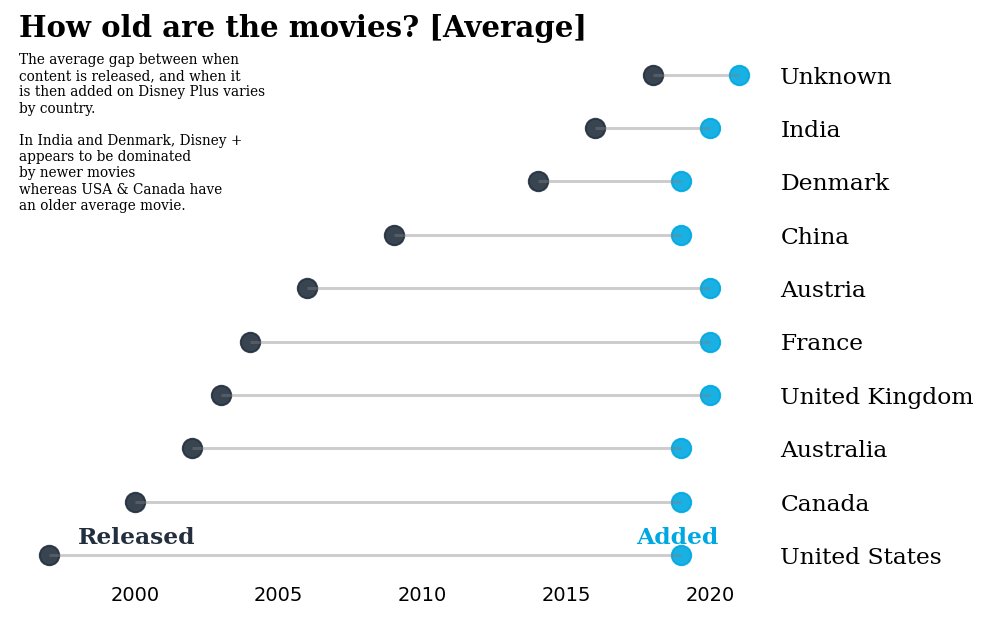

In [20]:
### Relevant groupings

data = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#232F3E',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#00A8E1',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#232F3E')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#00A8E1')


fig.text(0.13, 0.63, 
'''The average gap between when 
content is released, and when it
is then added on Disney Plus varies
by country. 

In India and Denmark, Disney + 
appears to be dominated 
by newer movies 
whereas USA & Canada have
an older average movie.
'''

, fontsize=7, fontweight='light', fontfamily='serif')


#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

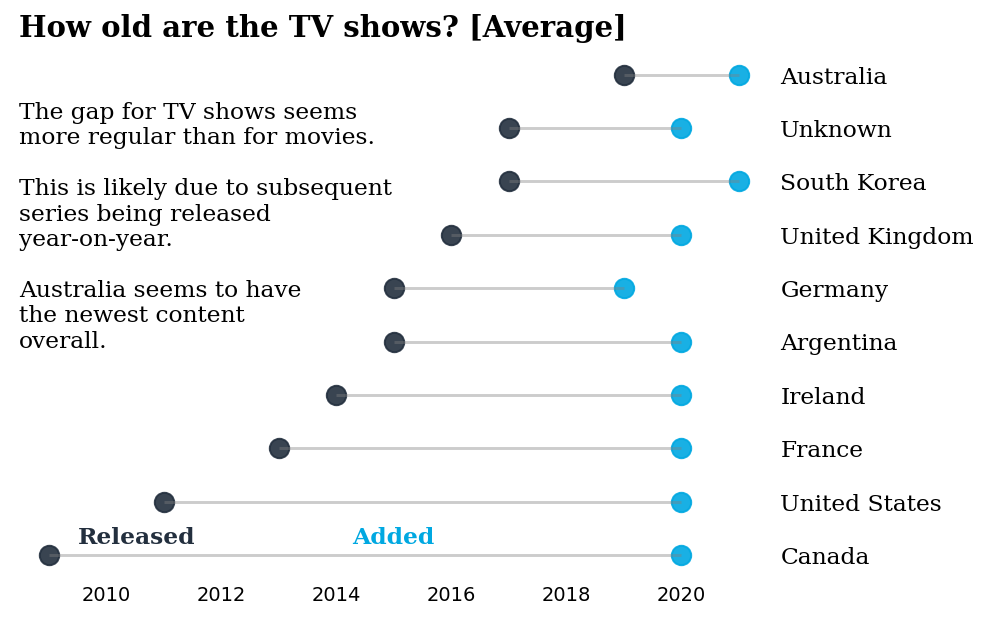

In [21]:
data = df_tv.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_tv.loc[df_tv['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the TV shows? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#232F3E',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#00A8E1',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)


fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#232F3E')

fig.text(0.47,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#00A8E1')


fig.text(0.13, 0.42, 
'''The gap for TV shows seems
more regular than for movies.

This is likely due to subsequent
series being released
year-on-year.

Australia seems to have
the newest content
overall.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


ax.tick_params(axis=u'both', which=u'both',length=0)
#plt.xlabel('Value of the variables')
#plt.ylabel('Group')
plt.show()

In [22]:
df ['full_text'] = df['type']+" "+df["title"]+" "+df["director"]+" "+df['cast']+" "+df["listed_in"]+" "+df["description"]

In [23]:
df.iloc[199]

show_id                                                          s200
type                                                            Movie
title                                                    The Pacifier
director                                                Adam Shankman
cast                Vin Diesel, Lauren Graham, Faith Ford, Brittan...
country                                         Canada, United States
date_added                                        2021-06-11 00:00:00
release_year                                                     2005
rating                                                             PG
duration                                                       97 min
listed_in                     Action-Adventure, Comedy, Spy/Espionage
description         A Navy SEAL gets his toughest mission yet: Bab...
month_added                                                       6.0
month_name_added                                                 June
year_added          

In [24]:
df["full_text"][199]

'Movie The Pacifier Adam Shankman Vin Diesel, Lauren Graham, Faith Ford, Brittany Snow, Max Thieriot, Chris Potter Action-Adventure, Comedy, Spy/Espionage A Navy SEAL gets his toughest mission yet: Babysitting.'

In [25]:
for i,v in enumerate(df.itertuples()):
    df.at[i,"full_text"] = re.sub(r'\[[0-9]*\]',' ',df.at[i,"full_text"])
    df.at[i,"full_text"] = re.sub(r'\s+',' ',df.at[i,"full_text"])
    df.at[i,"full_text"] = df.at[i,"full_text"].lower()
    df.at[i,"full_text"] = re.sub(r'\d',' ',df.at[i,"full_text"])
    df.at[i,"full_text"] = re.sub(r'\s+',' ',df.at[i,"full_text"])
    df.at[i,"full_text"] = nltk.sent_tokenize(df.at[i,"full_text"])
    df.at[i,"full_text"] = [word for word in df.at[i,"full_text"] if word not in stopwords.words('english')]

In [26]:
df["full_text"][223]

['tv show race to the center of the earth unknown chris payne gilbert action-adventure, family, game show / competition race to the center of the earth.',
 'four epic courses.',
 'one finish line.']

In [27]:
model = Word2Vec(df["full_text"], min_count=1)

In [28]:
words = model.wv

print(words.most_similar(df["full_text"][223]))

[('movie planes: fire & rescue bobs gannaway dane cook, ed harris, julie bowen, curtis armstrong, john higgins, hal holbrook action-adventure, animation, comedy air racer dusty teams up with a dynamic crew of flying firefighters.', 0.36993011832237244), ('program is presented as originally created.', 0.3001287579536438), ('movie smoky mountain park rangers unknown peter jessop animals & nature, documentary park rangers protect the wildlife in great smoky mountain national park.', 0.2926008105278015), ('movie cars toon: mater private eye rob gibbs larry the cable guy , keith ferguson animation, comedy, family mater searches for clues on a major crime scene.', 0.2839674949645996), ('tv show unlikely animal friends unknown mark keller animals & nature, docuseries, family this series reveals the stories of unlikely duos that have struck up unusual relationships.', 0.2833261489868164), ("tv show disney just roll with it unknown ramon reed, kaylin hayman, suzi barrett, tobie windham comedy, 

In [30]:
df['directors'] = df['director'].apply(lambda l: \
        ([] if pd.isna(l) else [i.strip() for i in l.split(',')]))
df['categories'] = df['listed_in'].apply(lambda l: \
        ([] if pd.isna(l) else [i.strip() for i in l.split(',')]))
df['actors'] = df['cast'].apply(lambda l: \
                                ([] if pd.isna(l) else [i.strip()
                                for i in l.split(',')]))
df['countries'] = df['country'].apply(lambda l: \
        ([] if pd.isna(l) else [i.strip() for i in l.split(',')]))

In [31]:


start_time = time.time()
text_content = df['description']
vector = TfidfVectorizer(
    max_df=0.4,
    min_df=1,
    stop_words='english',
    lowercase=True,
    use_idf=True,
    norm=u'l2',
    smooth_idf=True,
    )
tfidf = vector.fit_transform(text_content)

def find_similar(tfidf_matrix, index, top_n=5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index + 1],
            tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::
                            -1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

In [32]:
G = nx.Graph(label='MOVIE')
start_time = time.time()
for (i, rowi) in df.iterrows():
    G.add_node(rowi['title'], key=rowi['show_id'], label='MOVIE',
               mtype=rowi['type'], rating=rowi['rating'])
    for element in rowi['actors']:
        G.add_node(element, label='PERSON')
        G.add_edge(rowi['title'], element, label='ACTED_IN')
    for element in rowi['categories']:
        G.add_node(element, label='CAT')
        G.add_edge(rowi['title'], element, label='CAT_IN')
    for element in rowi['directors']:
        G.add_node(element, label='PERSON')
        G.add_edge(rowi['title'], element, label='DIRECTED')
    for element in rowi['countries']:
        G.add_node(element, label='COU')
        G.add_edge(rowi['title'], element, label='COU_IN')

    indices = find_similar(tfidf, i, top_n=5)
    snode = 'Sim(' + (rowi['title'])[:15].strip() + ')'
    G.add_node(snode, label='SIMILAR')
    G.add_edge(rowi['title'], snode, label='SIMILARITY')
    for element in indices:
        G.add_edge(snode, df['title'].loc[element], label='SIMILARITY')


def get_all_adj_nodes(list_in):
    sub_graph = set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
            sub_graph.add(e)
    return list(sub_graph)


def draw_sub_graph(sub_graph, size='s'):
    subgraph = G.subgraph(sub_graph)
    colors = []
    for e in subgraph.nodes():
        if G.nodes[e]['label'] == 'MOVIE':
            colors.append('#96cdeb')
        elif G.nodes[e]['label'] == 'PERSON':
            colors.append('#ed859d')
        elif G.nodes[e]['label'] == 'CAT':
            colors.append('#9ce087')
        elif G.nodes[e]['label'] == 'COU':
            colors.append('#edf283')
        elif G.nodes[e]['label'] == 'SIMILAR':
            colors.append('#edb672')
        elif G.nodes[e]['label'] == 'CLUSTER':
            colors.append('#edb672')

    if size == 's':
        plt.figure(figsize=(8, 8))
    else:
        plt.figure(figsize=(15, 15))
    nx.draw(subgraph, with_labels=True, font_size=12,
            node_color=colors, edge_color='#c4c2be')
    plt.show()


def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2 == root:
                continue
            if G.nodes[e2]['label'] == 'MOVIE':
                commons = commons_dict.get(e2)
                if commons == None:
                    commons_dict.update({e2: [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2: commons})
    movies = []
    weight = []
    for (key, values) in commons_dict.items():
        w = 0.0
        for e in values:
            w = w + 1 / math.log(G.degree(e))
        movies.append(key)
        weight.append(w)

    result = pd.Series(data=np.array(weight), index=movies)
    result.sort_values(inplace=True, ascending=False)
    return result

def recommend(input_movie):
    print("*"*40+"\n\n Movie: "+input_movie+"\n\n"+"*"*40)

    list_in = [input_movie]
    sub_graph = get_all_adj_nodes(list_in)
    draw_sub_graph(sub_graph)

    result = get_recommendation(input_movie)
    print(result.head())

    print ("\n")
    print("*"*100+"\n\n Extended Recommendation with Attributes")
    # print ("\n")
    print("*"*100)

    reco=list(result.index[:4].values)
    reco.extend([input_movie])
    sub_graph = get_all_adj_nodes(reco)
    draw_sub_graph(sub_graph, size='w')

****************************************

 Movie: Marvel Studios' Captain America: Civil War

****************************************


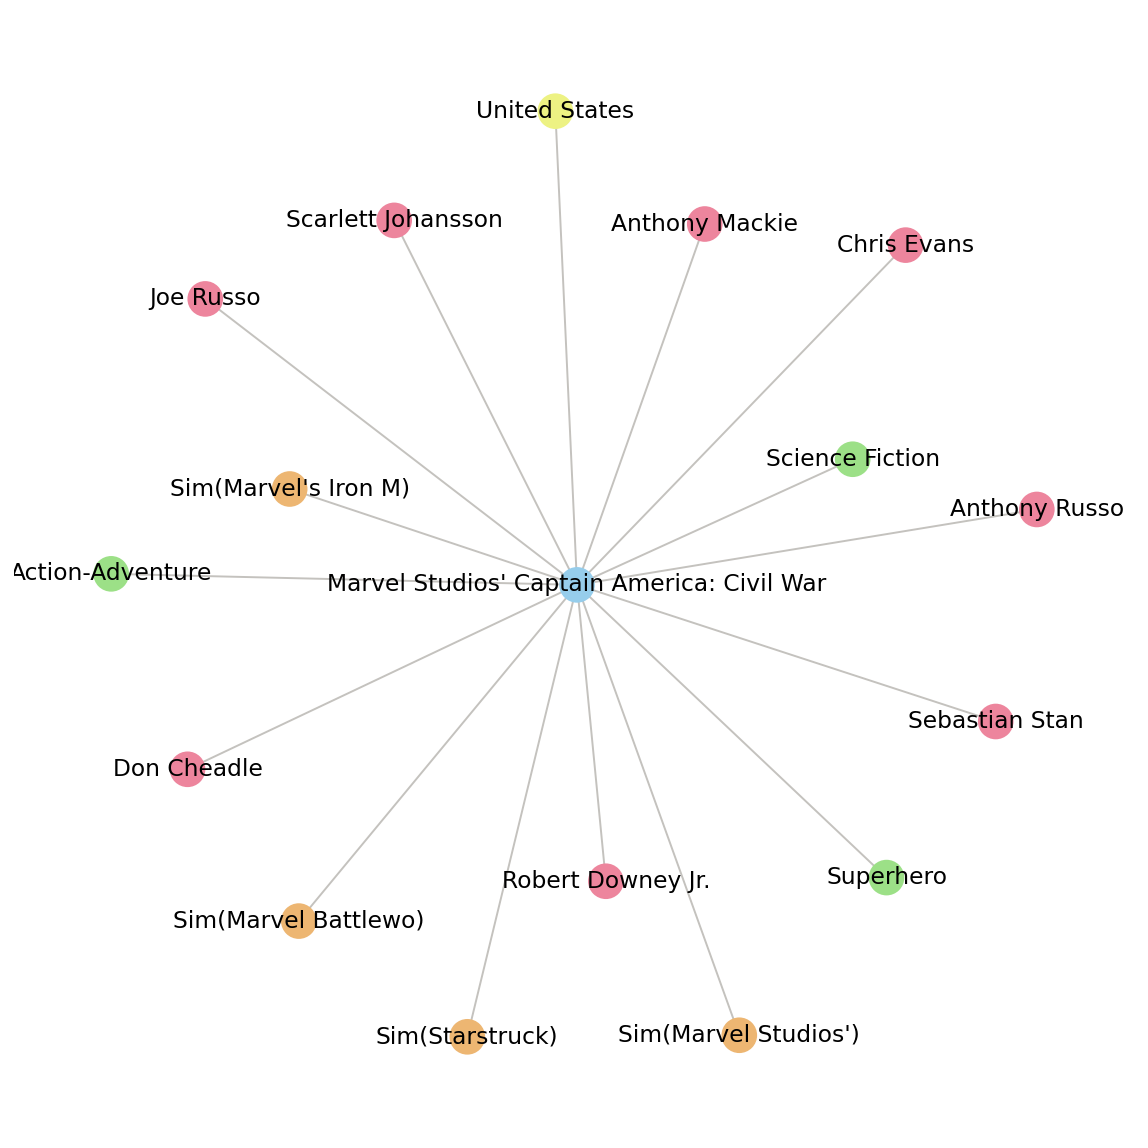

Marvel Studios' Captain America: The Winter Soldier    5.514534
Marvel Studios' Avengers: Infinity War                 4.264672
Marvel Studios' Avengers: Endgame                      3.543324
Marvel Studios' Captain America: The First Avenger     2.727306
Marvel Studios' Iron Man 2                             2.706480
dtype: float64


****************************************************************************************************

 Extended Recommendation with Attributes
****************************************************************************************************


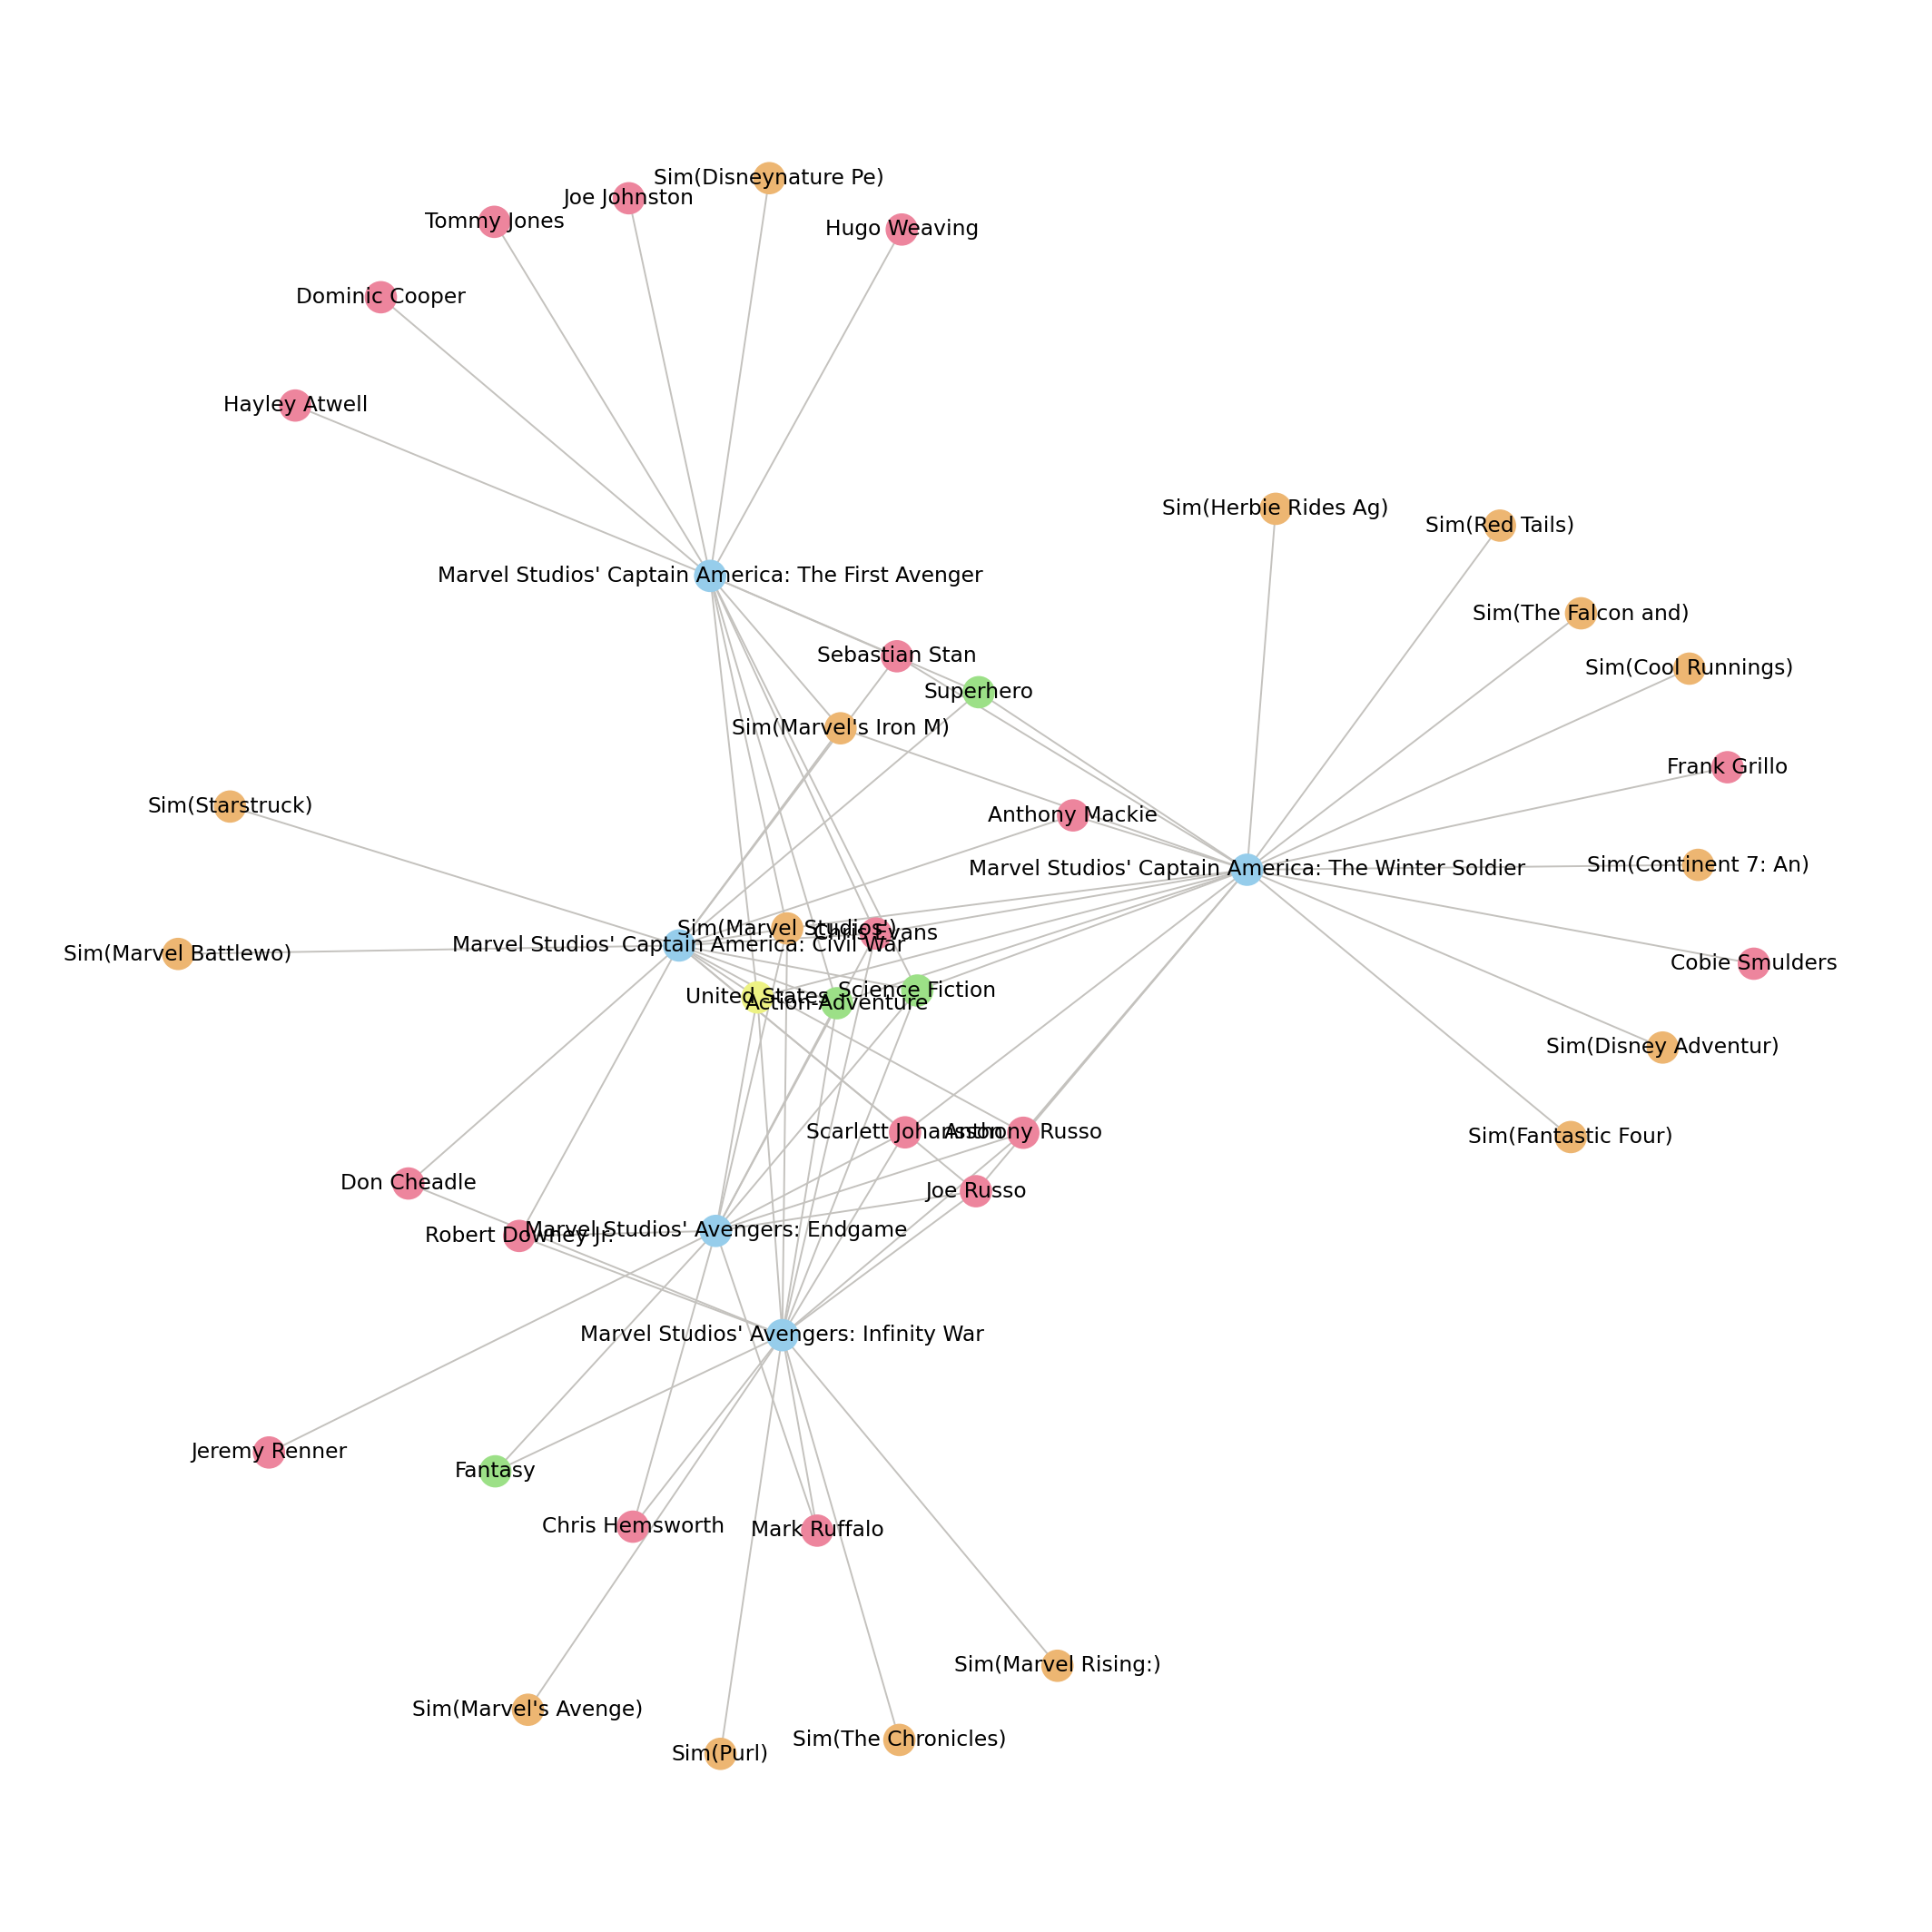

In [33]:
recommend("Marvel Studios' Captain America: Civil War")